<a href="https://colab.research.google.com/github/pabloperfer/CUDAexercises/blob/main/accelerat_zero_supression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# This allow us to plot right here in the notebook
%matplotlib inline

# Hacking up a noisy pulse train
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n)*3
pulses= np.maximum(np.sin(np.arange(n)/(n/23))-0.3,0.0)
waveform=((pulses*300)+noise).astype(np.int16)


In [4]:
from numba import vectorize, cuda
@vectorize(['int16(int16,int16)'],target='cuda')
def zero_suppress(waveform_value, threshold):
  if waveform_value < threshold:
    result = 0
  else:
    result = waveform_value
  return result

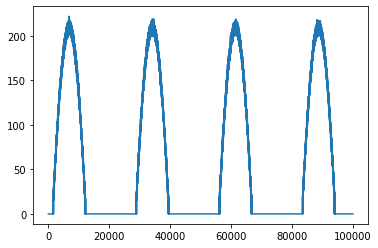

In [5]:
plt.plot(zero_suppress(waveform, 15))